# 서포트 벡터 머신(Support Vectio Machine)
```sklearn.svm.SVC()```

| 새로운 데이터가 입력되었을 때 기존 데이터를 활용해 분류하는 방법
 
*특성의 스케일에 민감! => Scaler!*

| 패턴인식, 자료분석 등을 위한 지도학습 모델

SVM 분류기는 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 최대가 되도록 학습

* 회귀분석에도 사용 가능하지만(SVR), 분류기에서의 목표를 반대로 적용하여 제한된 마진 오류 안에서 도로안에 가능한 많은 데이터 샘플이 들어가도록 학습

### classification 데이터 예제 (svm.SVC)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # 데이터 분할
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.svm import SVC, SVR # 분류, 회귀 모델
from sklearn.svm import LinearSVC # 시각화용 모델
from sklearn.metrics import * # 성능 지표


In [3]:
c = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv')
c.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


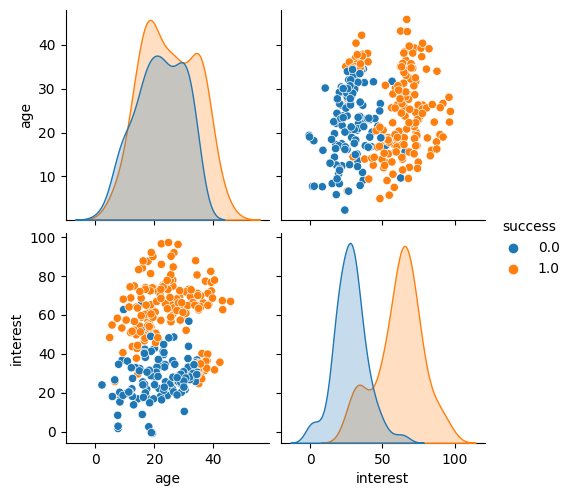

In [4]:
# 클래스 분포 시각화
sns.pairplot(hue='success', data=c);

In [7]:
# 데이터 분할
x = c.drop('success', axis=1)
y = c['success']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=1) # 데이터 불균형 고려

In [8]:
# 표준화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [9]:
# 모델 학습
clf = SVC(C=0.5, random_state=45)
clf.fit(x_train, y_train)
# 예측
y_pred_tt = clf.predict(x_test)
# 성능 평가
cm = confusion_matrix(y_test, y_pred_tt)
acc = accuracy_score(y_test, y_pred_tt)
prc = precision_score(y_test, y_pred_tt)
rcll = recall_score(y_test, y_pred_tt)
f1 = f1_score(y_test, y_pred_tt)

print(cm)
print(f'''
      정확도: {acc.round(2)}
      정밀도: {prc.round(2)}
      재현율: {rcll.round(2)}
      F1: {f1.round(2)}''')

[[37  2]
 [ 2 49]]

      정확도: 0.96
      정밀도: 0.96
      재현율: 0.96
      F1: 0.96


* SVC 모델의 C(cost) 파라미터

    C값이 커지면 마진과 옳지 않은 데이터의 허용치가 증가


### 회귀 예제 svm.SVR

In [10]:
# 샘플 데이터 생성
x = np.sort(5 * np.random.rand(40,1), axis=0)
y = np.sin(x).ravel()
# 타겟데이터에 노이즈 추가
y[::5] += 3 * (0.5 - np.random.rand(8)) 


In [11]:
# 모델 학습
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1) # 커널로 랜덤포레스트 알고리즘 선택 C가 클수록 더 많은 데이터 허용 => 회귀 예측
svr_rbf.fit(x, y)


SVR(C=100, gamma=0.1)